In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  

C:\Users\ashupatel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ashupatel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\ashupatel\AppData\Local\Continuum\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### OLS

In [3]:
data = load_boston()
print(data.keys())

boston = pd.DataFrame(data = data['data'], columns = data["feature_names"])
boston["Price"] = data["target"]
boston.head()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
# descriptive measure
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* The mean house price is $ 225328
* The median house price is $ 212000

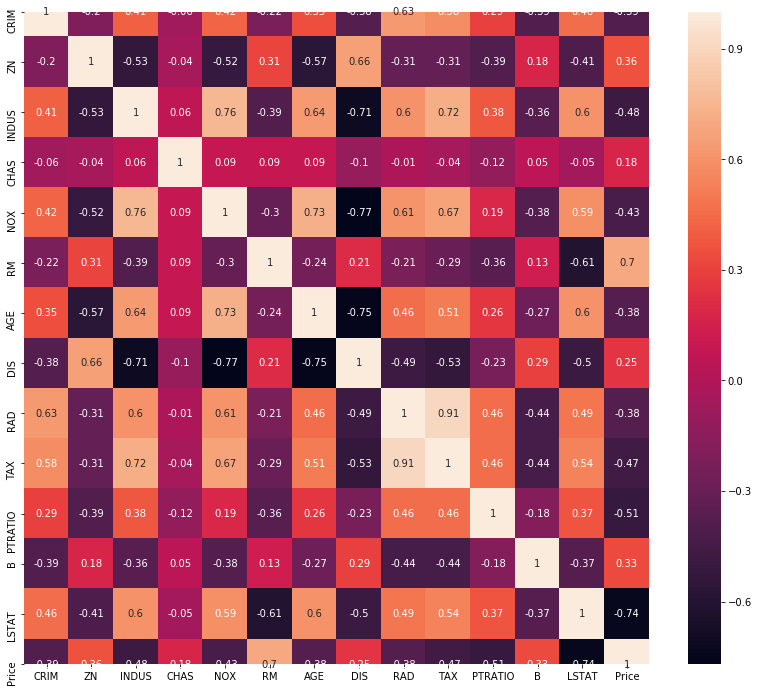

In [5]:
# Correlation matrix
corr_matrix = boston.corr().round(2)
plt.figure(figsize = (14, 12))
sns.heatmap(data = corr_matrix, annot = True)
plt.show()

LSTAT is the most correlated with Price. 

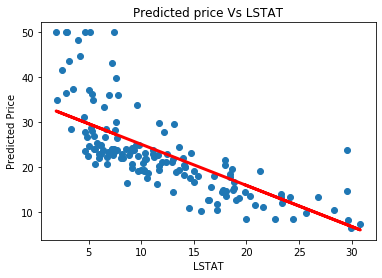

In [6]:
X = boston["LSTAT"].values
y = boston["Price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1,
                                                   test_size = 0.3)
lm = LinearRegression(n_jobs = 7, normalize = True)
lm.fit(X_train.reshape(-1,1), y_train)

y_pred = lm.predict(X_test.reshape(-1,1))

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red', linewidth = 3)
plt.xlabel("LSTAT")
plt.ylabel("Predicted Price")
plt.title("Predicted price Vs LSTAT")
plt.show()

In [7]:
print('coef: {:.2f}'.format(lm.coef_[0]))
print('intercept: {:.2f}'.format(lm.intercept_))

coef: -0.92
intercept: 34.22


In [8]:
# Estimate the parameter manually
corr = boston["LSTAT"].corr(boston['Price'])
std_y = boston["Price"].std()
std_x = boston["LSTAT"].std()
beta = corr*(std_y/std_x)
print(beta)

-0.9500493537579908


In [9]:
# Using Matrix Method
# from numpy.linalg import inv
# X = boston["LSTAT"].values.reshape(-1, 1)
# Y = boston["Price"].values.reshape(-1, 1)
# beta = inv(X.transpose()*X)*X.transpose()*Y
# beta

### Performance metric

In [10]:
X_LSTAT = pd.DataFrame({"lstat": boston["LSTAT"], "price": boston["Price"]})
X_LSTAT['tss'] = (X_LSTAT["price"] - X_LSTAT["price"].mean())**2
X_LSTAT['prediced_price'] = lm.predict(boston["LSTAT"].values.reshape(-1, 1))
X_LSTAT['ess'] = (X_LSTAT["prediced_price"] - X_LSTAT["price"].mean())**2 # check
X_LSTAT['rss'] = (X_LSTAT["prediced_price"] - X_LSTAT["price"])**2
X_LSTAT.head()

,lstat,price,tss,prediced_price,ess,rss
0,4.98,24.0,2.152657,29.656713,50.750042,31.998398
1,9.14,21.6,0.870128,25.843276,10.959207,18.005388
2,4.03,34.7,148.040602,30.527570,63.916241,17.409175
3,2.94,33.4,118.095898,31.526764,80.891266,3.509015
4,5.33,36.2,186.792183,29.335871,46.281684,47.116272


In [11]:
# R_square = ESS/TSS
print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("R2: {:.2f}".format(r2_score(y_test, y_pred)*100))

MSE: 42.62
R2: 53.50


A model with an R2 of 0 is no better than a model that always predicts the mean of the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable.

### Multiple Linear Regression

In [12]:
X = boston.drop('Price', axis = 1).values
y = boston["Price"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state =1,
                                                   test_size = 0.3)

In [13]:
lm_mlr = LinearRegression(n_jobs = 7, normalize = True)
lm_mlr.fit(X_train, y_train)

y_pred_train = lm_mlr.predict(X_train)
y_pred_test = lm_mlr.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_test)*100))

MSE: 42.62
On training dataset R2: 71.04
On testing dataset R2: 78.36


This model looks good as there is no overfitting.

In [14]:
print("coef: ",lm_mlr.coef_)

coef:  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


Clearly, the R sqaured is increased when we have taken in account the remaining feature also.

Least Square Method finds the Best and Unbiased Coefficients. Here unbiased means that OLS doesn’t consider which independent variable is more important than others.

### Learning Curve

In [15]:
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
warnings.filterwarnings("ignore")

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit, train_test_split

def ModelLearning(X, y):
    """ Calculates the performance of several models with varying sizes of training data.
        The learning and testing scores for each model are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 0)

    # Generate the training set sizes increasing by 50
    train_sizes = np.rint(np.linspace(1, X.shape[0]*0.8 - 1, 9)).astype(int)

    # Create the figure window
    fig = plt.figure(figsize=(10,7))

    # Create three different models based on max_depth
    for k, depth in enumerate([1,3,6,10]):
        
        # Create a Decision tree regressor at max_depth = depth
        regressor = DecisionTreeRegressor(max_depth = depth)

        # Calculate the training and testing scores
        sizes, train_scores, test_scores = learning_curve(regressor, X, y, \
            cv = cv, train_sizes = train_sizes, scoring = 'r2')
        
        # Find the mean and standard deviation for smoothing
        train_std = np.std(train_scores, axis = 1)
        train_mean = np.mean(train_scores, axis = 1)
        test_std = np.std(test_scores, axis = 1)
        test_mean = np.mean(test_scores, axis = 1)

        # Subplot the learning curve 
        ax = fig.add_subplot(2, 2, k+1)
        ax.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
        ax.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
        ax.fill_between(sizes, train_mean - train_std, \
            train_mean + train_std, alpha = 0.15, color = 'r')
        ax.fill_between(sizes, test_mean - test_std, \
            test_mean + test_std, alpha = 0.15, color = 'g')
        
        # Labels
        ax.set_title('max_depth = %s'%(depth))
        ax.set_xlabel('Number of Training Points')
        ax.set_ylabel('Score')
        ax.set_xlim([0, X.shape[0]*0.8])
        ax.set_ylim([-0.05, 1.05])
    
    # Visual aesthetics
    ax.legend(bbox_to_anchor=(1.05, 2.05), loc='lower left', borderaxespad = 0.)
    fig.suptitle('Decision Tree Regressor Learning Performances', fontsize = 16, y = 1.03)
    fig.tight_layout()
    fig.show()


def ModelComplexity(X, y):
    """ Calculates the performance of the model as model complexity increases.
        The learning and testing errors rates are then plotted. """
    
    # Create 10 cross-validation sets for training and testing
    cv = ShuffleSplit(X.shape[0], test_size = 0.2, random_state = 0)

    # Vary the max_depth parameter from 1 to 10
    max_depth = np.arange(1,11)

    # Calculate the training and testing scores
    train_scores, test_scores = validation_curve(DecisionTreeRegressor(), X, y, \
        param_name = "max_depth", param_range = max_depth, cv = cv, scoring = 'r2')

    # Find the mean and standard deviation for smoothing
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the validation curve
    plt.figure(figsize=(7, 5))
    plt.title('Decision Tree Regressor Complexity Performance')
    plt.plot(max_depth, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(max_depth, test_mean, 'o-', color = 'g', label = 'Validation Score')
    plt.fill_between(max_depth, train_mean - train_std, \
        train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(max_depth, test_mean - test_std, \
        test_mean + test_std, alpha = 0.15, color = 'g')
    
    # Visual aesthetics
    plt.legend(loc = 'lower right')
    plt.xlabel('Maximum Depth')
    plt.ylabel('Score')
    plt.ylim([-0.05,1.05])
    plt.show()


def PredictTrials(X, y, fitter, data):
    """ Performs trials of fitting and predicting data. """

    # Store the predicted prices
    prices = []

    for k in range(10):
        # Split the data
        X_train, X_test, y_train, y_test = train_test_split(X, y, \
            test_size = 0.2, random_state = k)
        
        # Fit the data
        reg = fitter(X_train, y_train)
        
        # Make a prediction
        pred = reg.predict([data[0]])[0]
        prices.append(pred)
        
        # Result
        print("Trial {}: ${:,.2f}".format(k+1, pred))

    # Display price range
    print("\nRange in prices: ${:,.2f}".format(max(prices) - min(prices)))

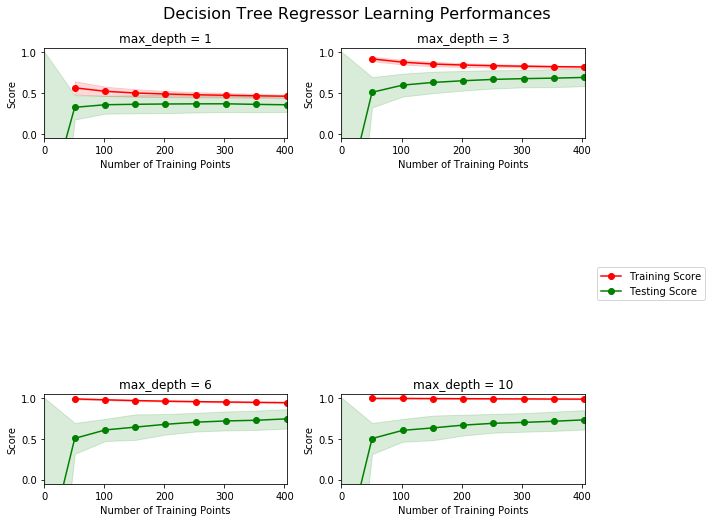

In [16]:
ModelLearning(X, y)

#### Inference
* Model tends to overfit when there are very vew data point.
* When max_depth is 1, model underfits.
* When max_depth is 1, model underfits.
* There is a sweet spot at somewhere around max_depth = 3

### Model Complexity

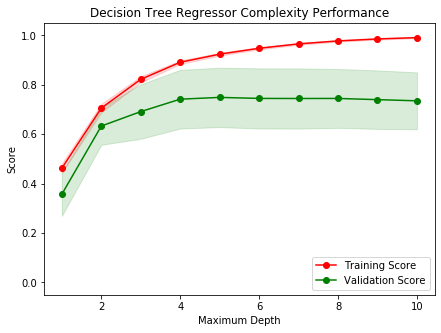

In [17]:
ModelComplexity(X, y)

We will see if we can imporve our model by reducing the complexity of model.

### Weaknesses of OLS Linear Regression
Linear regression finds the coefficient values that maximize R²/minimize RSS. But this may not be the best model, and will give a coefficient for each predictor provided. This includes terms with little predictive power. This results in a high-variance, low bias model. We therefore have the potential to improve our model by trading some of that variance with bias to reduce our overall error. This trade comes in the form of regularization, in which we modify our cost function to restrict the values of our coefficients. This allows us to trade our excessive variance for some bias, potentially reducing our overall error.

## Regularization: Penalize the Magnitude of Coefficients
The size of coefficients increase exponentially with increase in model complexity. As the model complexity increases, the models tends to fit even smaller deviations in the training data set. This lead to overfitting.
<br>With sufficiently large coefficient it is possible to fit any function</br>

A regularization technique helps in the following main ways-
1. Doesn’t assume any particular distribution of the dependent variable ( DV). The DV can follow any distribution such as normal, binomial, possison etc. Hence the name Generalized Linear Models (GLMs)
2. Address Variance-Bias Tradeoffs. Generally will lower the variance from the model
3. More robust to handle multicollinearity
4. Better sparse data (observations < features) handling
5. Natural feature selection
6. More accurate prediction on new data as it minimizes overfitting on the train data
7. Easier interpretation of the output

### Ridge Regression
 Performs L2 regularization, i.e. adds penalty equivalent to square of the magnitude of coefficients
 <br>Minimization objective = OLS + α * (sum of square of coefficients)</br>

Ridge regression puts constraint on the coefficients (w). The penalty term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized. So, ridge regression shrinks the coefficients and it helps to reduce the model complexity and multi-collinearity. 
<center>$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$</center>

In [18]:
# initialize
ridge_reg = Ridge(alpha=0, normalize=True)
ridge_reg.fit(X_train, y_train)
ridge_df = pd.DataFrame({'variable': boston.drop('Price', axis = 1).columns, 'estimate': ridge_reg.coef_})
ridge_train_pred = []
ridge_test_pred = []

# iterate lambdas
for alpha in np.arange(1, 200, 1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)
    var_name = 'estimate' + str(alpha)
    ridge_df[var_name] = ridge_reg.coef_
    

# organize dataframe
#ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').rename_axis(None, 1).reset_index()
ridge_df = ridge_df.set_index('variable').T.reset_index()

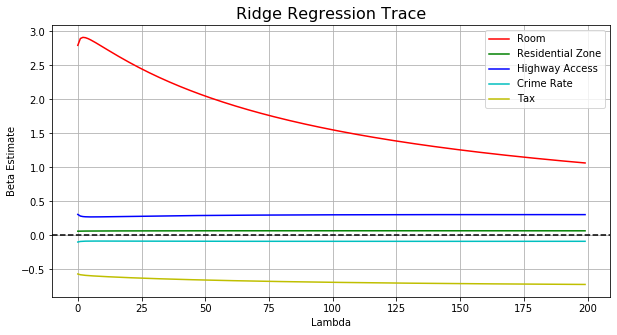

In [19]:
# plot betas by lambda
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.RM, 'r', ridge_df.ZN, 'g', ridge_df.RAD, 'b', ridge_df.CRIM, 'c', ridge_df.LSTAT, 'y')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Lambda")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Room','Residential Zone','Highway Access','Crime Rate','Tax'])
ax.grid(True)

‘Room’ should be the best indicator for house price by intuition. This is why the line in red does not quite shrink over iteration. If we increase the lambda more and more (extremely biased), then only ‘Room’ would stay significant, which makes sense again because the number of rooms must explain the most.

#### Ridge hyperparameter tunning

In [20]:
mse = []
alpha_ridge_range = np.arange(0, 10)
for i in alpha_ridge_range:
    ridge_reg = Ridge(alpha = i)
    ridge_reg.fit(X_train , y_train)
    y_pred_ridge = ridge_reg.predict(X_test)
    mse.append(mean_squared_error(y_test, y_pred_ridge))

mse_array = np.array(mse)
optimal_alpha = np.argmin(mse_array)

# Build ridge regression model
optimal_ridge = Ridge(alpha = alpha_ridge_range[optimal_alpha])
optimal_ridge.fit(X_train , y_train)

y_pred_ridge_train = optimal_ridge.predict(X_train)
y_pred_ridge_test = optimal_ridge.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_ridge_test)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_ridge_test)*100))

MSE: 19.33
On training dataset R2: 71.04
On testing dataset R2: 78.91


R sqaure is slight increased. This means  an OLS model with some bias is better at prediction than the pure OLS model.

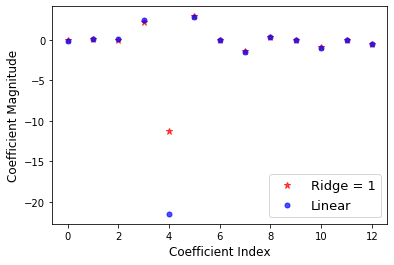

In [21]:
# Plot coefficient of Linear and Ridge Regression
plt.plot(optimal_ridge.coef_, alpha = 0.7, linestyle = 'none', marker = '*', markersize = 7, 
         color = 'red', label = r'Ridge = 1',zorder=7)
plt.plot(lm_mlr.coef_, alpha = 0.7, linestyle = 'none', marker = 'o', markersize = 5, 
         color = 'blue', label = r'Linear',zorder=7)

plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.legend(fontsize=13,loc=4)
plt.show()

This straight away gives us the following inferences:
* The RSS increases with increase in alpha, this model complexity reduces
* High alpha values can lead to significant underfitting. Note the rapid increase in RSS for values of alpha greater than 1
* Though the coefficients are very very small, they are NOT zero.

#### Advantages of Ridge
1. It generally works well even in presence of highly correlated features as it will include all of them in the model but the coefficients will be distributed among them depending on the correlation.
2. When p > n, it is capable of selecting more than n relevant predictors if necessary unlike Lasso.

#### Disadvantages of Ridge
1. It can minimize the feature coefficient, however can never terminate them to zero. Hence it is not useful in feature selection.

### Lasso (least absolute shrinkage and selection operator)
Lasso regression performs L1 regularization, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective.Thus, lasso regression optimizes the following:

Objective = RSS + α * (sum of absolute value of coefficients)

This additional term penalizes the model for having coefficients that do not explain a sufficient amount of variance in the data. It also has a tendency to set the coefficients of the bad predictors mentioned above 0. This makes Lasso useful in feature selection.

In [22]:
mse_lasso = []
alpha_lasso_range = np.arange(0.001, 1, 0.001)
for i in alpha_lasso_range:
    lasso = Lasso(alpha = i)
    lasso.fit(X_train , y_train)
    y_pred_lasso = lasso.predict(X_test)
    mse_lasso.append(mean_squared_error(y_test, y_pred_lasso))

mse_array_lasso = np.array(mse_lasso)
optimal_alpha_lasso = np.argmin(mse_array_lasso)

# Build ridge regression model
optimal_lasso = Lasso(alpha = alpha_lasso_range[optimal_alpha_lasso])
optimal_lasso.fit(X_train , y_train)

y_pred_lasso_train = optimal_lasso.predict(X_train)
y_pred_lasso_test = optimal_lasso.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_lasso_test)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_lasso_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_lasso_test)*100))

MSE: 19.51
On training dataset R2: 70.62
On testing dataset R2: 78.71


#### Lasso for Feature Selection

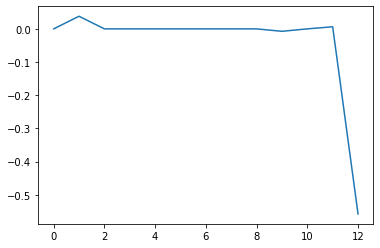

In [23]:
# Feature Selection
feature_select = Lasso(alpha = 10)
feature_select.fit(X_train, y_train)
plt.plot(feature_select.coef_)

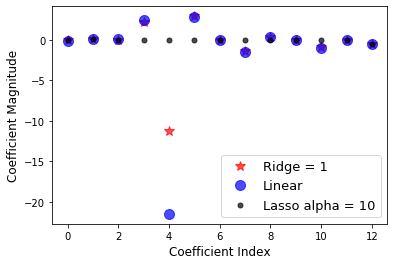

In [24]:
# Plot coefficient of Linear and Ridge Regression
plt.plot(optimal_ridge.coef_, alpha = 0.7, linestyle = 'none', marker = '*', markersize = 10, 
         color = 'red', label = r'Ridge = 1',zorder=7)
plt.plot(lm_mlr.coef_, alpha = 0.7, linestyle = 'none', marker = 'o', markersize = 10, 
         color = 'blue', label = r'Linear',zorder=7)
plt.plot(feature_select.coef_, alpha = 0.7, linestyle = 'none', marker = 'o', markersize = 5, 
         color = 'black', label = r'Lasso alpha = 10',zorder=7)

plt.xlabel('Coefficient Index',fontsize=12)
plt.ylabel('Coefficient Magnitude',fontsize=12)
plt.legend(fontsize=13,loc=4)
plt.show()

According to this LSTAT is the most important feature and indeed this makes sense also because LSTAT has got highest correlation with Price.

Apart from the expected inference of higher RSS for higher alphas, we can see the following:

1. For the same values of alpha, the coefficients of lasso regression are much smaller as compared to that of ridge regression (compare row 1 of the 2 tables).
2. For the same alpha, lasso has higher RSS (poorer fit) as compared to ridge regression
3. Many of the coefficients are zero even for very small values of alpha. This phenomenon of most of the coefficients being zero is called **sparsity**.

#### Diadvantages of Lasso
1. Lasso however struggles with some types of data. If the number of predictors (p) is greater than the number of observations (n), Lasso will pick at most n predictors as non-zero, even if all predictors are relevant. 
2. Lasso will also struggle with colinear features (they’re related/correlated strongly), in which it will select only one predictor to represent the full suite of correlated predictors. This selection will also be done in a random way, also the chosen variable changes randomly with change in model parameters.which is bad for reproducibility and interpretation.

### Elastic Net Regression
ElasticNet is a linear regression model trained with both 
l1 and l2- norm regularization of the coefficients. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of l1 and l2 using the l1_ratio parameter.

The objective function to minimize is in this case
<br><center>$\min_{w} { \frac{1}{2n_{\text{samples}}} ||X w - y||_2 ^ 2 + \alpha \rho ||w||_1 + \frac{\alpha(1-\rho)}{2} ||w||_2 ^ 2}$</center></br>

In [25]:
elastic_net = ElasticNet(alpha = 0.01)
elastic_net.fit(X_train, y_train)

y_pred_en_train = elastic_net.predict(X_train)
y_pred_en_test = elastic_net.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_en_test)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_en_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_en_test)*100))

MSE: 19.37
On training dataset R2: 70.29
On testing dataset R2: 78.87


### Typical Use Cases
1. **Ridge:** It is majorly used to prevent overfitting. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
2. **Lasso:** Since it provides sparse solutions, it is generally the model of choice (or some variant of this concept) for modelling cases where the #features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored

### Least Angle Regression
**Least-angle regression (LARS) is a regression algorithm for high-dimensional data**. LARS is similar to forward stepwise regression. At each step, it finds the feature most correlated with the target. When there are multiple features having equal correlation, instead of continuing along the same feature, it proceeds in a direction equiangular between the features.

In [26]:
from sklearn.linear_model import Lars

lars = Lars()
lars.fit(X_train, y_train)
print("Model coefficient: ", lars.coef_)

Model coefficient:  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [27]:
y_pred_lars_train = lars.predict(X_train)
y_pred_lars_test = lars.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_lars_test)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_lars_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_lars_test)*100))

MSE: 19.83
On training dataset R2: 71.04
On testing dataset R2: 78.36


Finally, we'll create the plot to visualize the original and predicted data.

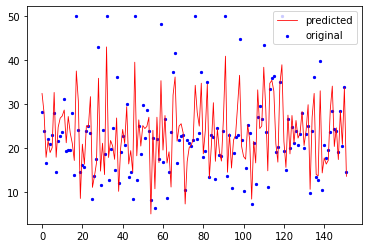

In [28]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_lars_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### LASSO LARS
LassoLars is a lasso model implemented using the LARS algorithm.

In [49]:
from sklearn.linear_model import LassoLars

lasso_lars = LassoLars(alpha =0.1).fit(X_train, y_train)
print("Model coefficient: ", lars.coef_)

Model coefficient:  [-9.85424717e-02  6.07841138e-02  5.91715401e-02  2.43955988e+00
 -2.14699650e+01  2.79581385e+00  3.57459778e-03 -1.51627218e+00
  3.07541745e-01 -1.12800166e-02 -1.00546640e+00  6.45018446e-03
 -5.68834539e-01]


In [50]:
y_pred_lassolars_train = lasso_lars.predict(X_train)
y_pred_lassolars_test = lasso_lars.predict(X_test)

print("MSE: {:.2f}".format(mean_squared_error(y_test, y_pred_lassolars_test)))  
print("On training dataset R2: {:.2f}".format(r2_score(y_train, y_pred_lassolars_train)*100))
print("On testing dataset R2: {:.2f}".format(r2_score(y_test, y_pred_lassolars_test)*100))

MSE: 27.65
On training dataset R2: 61.76
On testing dataset R2: 60.77


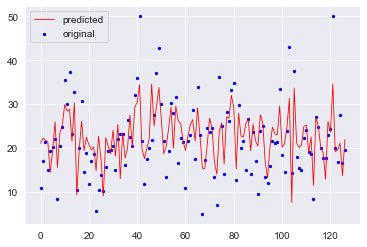

In [51]:
x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="original")
plt.plot(x_ax, y_pred_lassolars_test, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

#### Advantage of LARS and LASSOLARS
It is numerically efficient in contexts where the number of features is significantly greater than the number of samples.

#### DIsadvantage of LARS and LASSOLARS
From both the figures of model fitting train Vs test we can conclude that they do well to capture the genral trend in that but does awful job for large values (outliers) because LARS is based upon an iterative refitting of the residuals, it would appear to be especially sensitive to the effects of noise. 

## Comparitive Study 

In [30]:
import seaborn as sns
sns.set_style("darkgrid")

In [31]:
# Create random noise

n_houses = boston.shape[0]
rand_noise = np.random.rand(n_houses, 5)

rand_noise_df = pd.DataFrame(data=rand_noise, columns=['Noise_1', 'Noise_2', 'Noise_3', 'Noise_4', 'Noise_5'])
X = pd.concat([boston, rand_noise_df], axis=1).drop('Price', axis = 1)
y = boston['Price']

In [32]:
# create model
boston_lr = LinearRegression(normalize = True)
boston_ls = Lasso(normalize = True, alpha=0.1)
boston_rg = Ridge(normalize = True)
boston_en = ElasticNet(normalize = True, alpha=0.1)
models = [(boston_lr, 'Linear Regression'),
           (boston_ls, 'Lasso'),
           (boston_rg, "Ridge Regression"),
           (boston_en, "Elastic Net")]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)


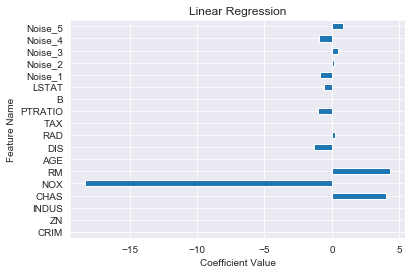

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)


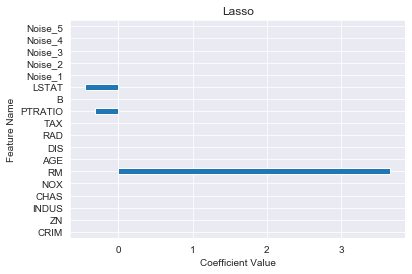

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)


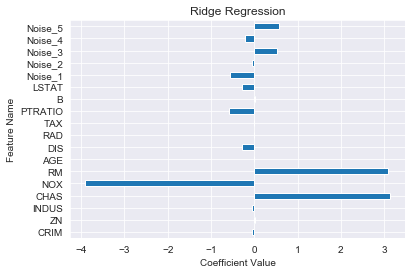

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)


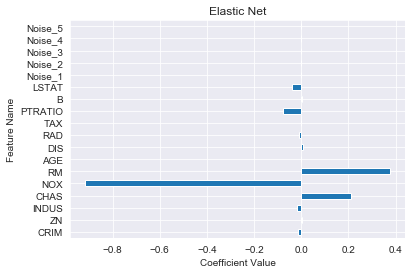

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=235)

for model in models:
    print(model[0])
    model[0].fit(X_train, y_train)
    pd.Series(model[0].coef_, 
              index=X.columns).plot(kind='barh')
    plt.title(model[1])
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature Name')
    plt.show()

#### Inference
1. We can see that linear regression assigned non-zero values to all 5 of our noise features, despite none of them having any predictive power. Interestingly, these noise features have coefficients with magnitudes similar to some of the real features in the dataset.
2. Lasso did a good job of reducing all 5 of our noise features to 0, as well as many of the real features from the dataset. This is indeed a much simpler model than given by linear regression.
3. Ridge Regression makes a similar mistake that unregularized linear regression, assigning coefficient values to our noise features. We also see some features have very small coefficients.
4. Much like Lasso, Elastic Net makes the coefficients of several features 0. It however does not make as many coefficients 0 as Lasso does.

In [34]:
for model in models:
    mse = mean_squared_error(model[0].predict(X_test), y_test)
    print(f"Mean Squared Error of {model[1]}: {mse:.2f}")

Mean Squared Error of Linear Regression: 24.22
Mean Squared Error of Lasso: 27.65
Mean Squared Error of Ridge Regression: 22.77
Mean Squared Error of Elastic Net: 57.23


1. Ridge Regression was the best model according to MSE.Ridge regression model traded some variance for bias, which ultimately lead to an overall smaller error. 
2. The Lasso and Elastic Net models traded a significant amount of variance for bias, and we see that our error has increased.
Interestingly, Lasso and Elastic Net had a higher MSE than Linear Regression. But does that mean that these models are unequivocally worse? I would argue not, as the Lasso and Elastic Net models also performed feature selection, which gives us better interpretability of the models. 
3. Coefficients are interpreted as the change in dependent variable with a one unit increase in predictor value, with all other predictors held constant. In the case of complex models, the assumption of holding all other predictors constant cannot reasonably be met.


Ultimately, which model to use ultimately depends on the goal of the analysis to begin with. Are we looking for the best predictions? Then ridge regression appears best. Are we looking for interpretability, for a better understanding of the underlying data? Then Elastic Net may be the way to go. It is our job as data science practitioners to define these expectations (before analysis starts) to help guide us to the best solution.

### Bayesian Regression